In [1]:
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import glob
import datetime

%matplotlib inline

In [39]:
date_start = '2017-01-01'
date_end   = '2017-04-23'

df = pd.read_csv(
    './data/cur.zentrum.nibelungenbruecke.traffic.risc-software.at.csv', 
    parse_dates = [0], 
    index_col = 0
)
df = df[date_start:date_end]
print df.columns

Index([u'delay', u'average_speed', u'delayed_average_speed', u'total_distance',
       u'total_duration', u'total_duration_in_traffic', u'day', u'dow', u'hod',
       u'working_day'],
      dtype='object')


In [40]:
def history_average(history_data, current_data):
    history_data['tod'] = history_data.index.time
    current_data['tod'] = current_data.index.time
    mean_wod = [history_data.wod == True  ].groupby('tod').mean().reset_index()
    mean_wnd = [history_data.wod == False ].groupby('tod').mean()
    std_wod  = [history_data.wod == True  ].groupby('tod').mean()
    std_wnd  = [history_data.wod == False ].groupby('tod').mean()
    
    current_data
    

In [59]:
h_data = df['2017-03-01':'2017-04-14'].copy()
c_data = df['2017-04-18':'2017-04-18'].copy()

In [60]:
h_data['tod'] = h_data.index.time
c_data['tod'] = c_data.index.time

In [61]:
mean_wod = h_data[h_data.working_day == True  ].groupby('tod').mean().reset_index()
mean_wnd = h_data[h_data.working_day == False ].groupby('tod').mean().reset_index()
std_wod  = h_data[h_data.working_day == True  ].groupby('tod').mean().reset_index()
std_wnd  = h_data[h_data.working_day == False ].groupby('tod').mean().reset_index()

In [62]:
c_data['delta'] = np.zeros(c_data.shape[0])

In [63]:
for i in range(0,24):
    c_data.loc[(c_data.tod == mean_wod.tod[i] ) & (c_data.working_day == True), 'delta'] = c_data[(c_data.tod == mean_wod.tod[i] ) & (c_data.working_day == True)].delay - mean_wod.delay[i]
for i in range(0,24):
    c_data.loc[(c_data.tod == mean_wnd.tod[i] ) & (c_data.working_day == False),'delta'] = c_data[(c_data.tod == mean_wnd.tod[i] ) & (c_data.working_day == False)].delay - mean_wnd.delay[i]

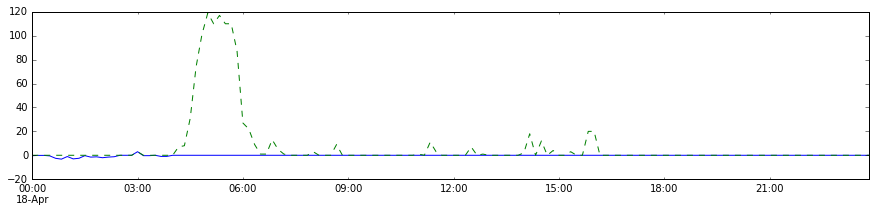

In [64]:
c_data.delta.plot(figsize=(15,3))
c_data.delay.plot(ls='--')

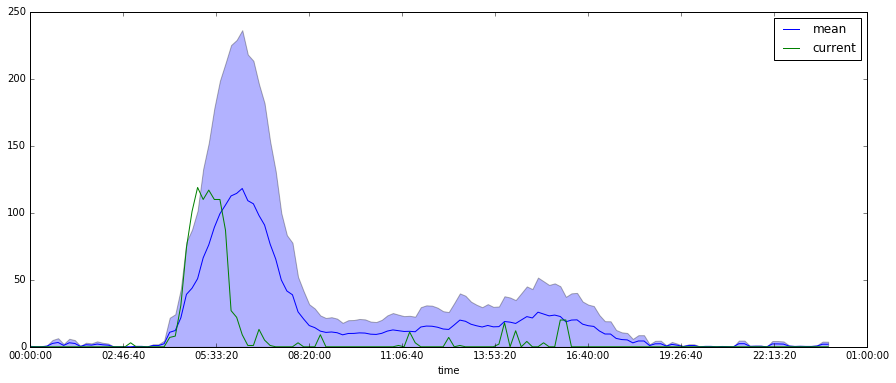

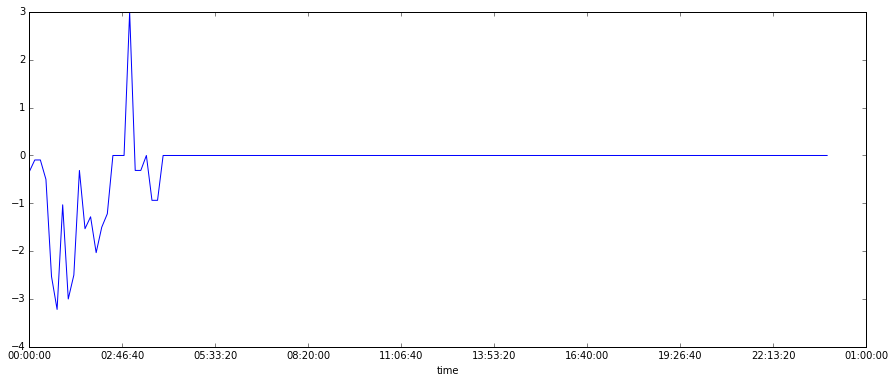

In [69]:
plt.figure(figsize=(15,6))
plt.plot(mean_wod.tod.values, mean_wod.delay, label = 'mean')
plt.fill_between(mean_wod.tod.values,
                 (mean_wod.delay - std_wod.delay),
                 (mean_wod.delay + std_wod.delay), 
                 alpha=0.3)
plt.plot(c_data.tod, c_data.delay, label = 'current')
plt.legend()
plt.show()
plt.figure(figsize=(15,6))
plt.plot(c_data.tod, c_data.delta, label = 'current')
plt.show()